In [1]:
# page 270부터 시작
# na값 찾기(누락값)
import pandas as pd
import numpy as np
string_data = pd.Series(["a","b", np.nan, "d"])
string_data.isnull()

0    False
1    False
2     True
3    False
dtype: bool

In [2]:
# 빈칸인 것을 빼 버리는 것.
data = pd.Series([1, np.nan, 3.5, np.nan, 7])
data.dropna()

0    1.0
2    3.5
4    7.0
dtype: float64

In [3]:
from numpy import nan as NA
data = pd.DataFrame([[1, 6.5, 3], [1, NA, NA], [NA, NA, NA], [NA, 6.5, 3]])
cleaned_data = data.dropna(how = 'all')          # how = 'all' 은 모든 값이 NA인 경우에만 없애주세요 이다.
cleaned_data

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
3,NaN,6.5,3.0


In [4]:
data[4] = NA
data

,0,1,2,4
0,1.0,6.5,3.0,NaN
1,1.0,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,6.5,3.0,NaN


In [5]:
cleaned_data2 = data.dropna(axis = 1, how = 'all')
cleaned_data2

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
2,NaN,NaN,NaN
3,NaN,6.5,3.0


In [6]:
# "treshold" : "문턱, 문지방"이라는 뜻으로, 우리나라말로는 '문턱값'이라는 말로 쓰인다. 일정 조건 이상의 데이터만 추출하는 개념.

In [7]:
df2 = data.fillna(0)
df2

,0,1,2,4
0,1.0,6.5,3.0,0.0
1,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0
3,0.0,6.5,3.0,0.0


In [8]:
df3 = data.fillna(0, inplace = True)     # 이건 값을 저장하든 말든 기존 객체를 변형시킴. df2를 변형시킨 게 아니라 data가 변형됨. df3은 아무것도 아닌게 됨.
df3
data

,0,1,2,4
0,1.0,6.5,3.0,0.0
1,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0
3,0.0,6.5,3.0,0.0


In [9]:
dic_data = {"k1":['one', 'two', 'one', 'two','one', 'two','two'],
           "k2":[1, 1, 2, 3, 3, 4, 4]}
data = pd.DataFrame(dic_data)
data

,k1,k2
0,one,1
1,two,1
2,one,2
3,two,3
4,one,3
5,two,4
6,two,4


In [10]:
data.duplicated()

0    False
1    False
2    False
3    False
4    False
5    False
6     True
dtype: bool

In [11]:
data.drop_duplicates()

,k1,k2
0,one,1
1,two,1
2,one,2
3,two,3
4,one,3
5,two,4


In [12]:
data['v1'] = [0,1,2,3,4,5,6]
data.drop_duplicates()

,k1,k2,v1
0,one,1,0
1,two,1,1
2,one,2,2
3,two,3,3
4,one,3,4
5,two,4,5
6,two,4,6


In [13]:
data['v1'] = [0,1,2,3,4,5,6]
data.drop_duplicates(['k1'])       # k1은 one, two밖에 없으니까 k1 기준으로 중복 제거 하면 맨 처음 나온 one, two만 남는 것.

,k1,k2,v1
0,one,1,0
1,two,1,1


In [14]:
data.drop_duplicates(['k1', 'k2'], keep = "last")

,k1,k2,v1
0,one,1,0
1,two,1,1
2,one,2,2
3,two,3,3
4,one,3,4
6,two,4,6


In [15]:
# map 함수 => 여러 개의 값에 대한 연산을 for 반복문 없이 전체 적용하여 실행하는 것.

In [16]:
ages = [20, 22, 25, 27, 21, 23, 37, 31, 61, 45, 41, 32]

In [17]:
bins = [18, 25, 35, 60, 100]

In [18]:
cats = pd.cut(ages, bins)
cats

[(18, 25], (18, 25], (18, 25], (25, 35], (18, 25], ..., (25, 35], (60, 100], (35, 60], (35, 60], (25, 35]]
Length: 12
Categories (4, interval[int64]): [(18, 25] < (25, 35] < (35, 60] < (60, 100]]

In [19]:
pd.value_counts(cats)

(18, 25]     5
(25, 35]     3
(35, 60]     3
(60, 100]    1
dtype: int64

In [31]:
# 정규표현식?page297~
import re
text = "foo bar\tbaz\tqux"
print(text)

foo bar	baz	qux


In [21]:
re.split('\s+', text)

['foo', 'bar', 'baz', 'qux']

In [36]:
text = """Dave dave@google.com
Steve steve@google.com
Rob rob@google.com
Ryan ryan@google.com
"""

pattern = r'[A-Z0-9._%+-]+@[A-Z0-9.-]+.[A-Z]{2,4}'
re1 = re.compile(pattern, flags = re.IGNORECASE)

In [37]:
re1.findall(text)

['dave@google.com', 'steve@google.com', 'rob@google.com', 'ryan@google.com']

In [38]:
data = pd.Series(np.random.randn(9),
                index = ['a','a','a', 'b','b', 'c','c', 'd','d'])
data

a   -0.760423
a    1.004839
a   -0.806950
b    0.708035
b    2.136436
c   -0.688894
c    0.509141
d    1.121781
d    1.162803
dtype: float64

In [39]:
data = pd.Series(np.random.randn(9),
                index = [['a','a','a', 'b','b', 'c','c', 'd','d'],
                [1, 2, 3, 1, 2, 1, 2, 1, 2]])
data

a  1   -1.187354
   2   -1.634009
   3    0.536030
b  1   -0.293031
   2    0.777276
c  1    0.633591
   2    0.257792
d  1   -2.469303
   2   -0.109504
dtype: float64

In [40]:
data['b']

1   -0.293031
2    0.777276
dtype: float64

In [41]:
# b, d 계층 슬라이싱됨.(view)
data.loc[['b','d']]

b  1   -0.293031
   2    0.777276
d  1   -2.469303
   2   -0.109504
dtype: float64

In [42]:
# 계층 단위 슬라이싱 안 되고, 레벨 b인덱싱에서 2에 해당하는 데이터가 추출되었다.
data.loc['b',2]

0.7772760405544613

In [47]:
df1 = pd.DataFrame({'key':['b', 'b', 'a', 'c', 'a', 'a', 'b'], 'data1':[0,1,2,3,4,5,6]})
df2 = pd.DataFrame({'key':['a','b','d',], 'data2':[0, 1, 2]})

In [48]:
# 중복된 키에 대해서만 합병이 된다. c 요소와 d요소는 양쪽에 동일하게 있는 key가 아니므로 합병시 사라짐.(교집합)
pd.merge(df1, df2)

,key,data1,data2
0,b,0,1
1,b,1,1
2,b,6,1
3,a,2,0
4,a,4,0
5,a,5,0


In [49]:
df3 = pd.DataFrame({'lkey':['b', 'b', 'a', 'c', 'a', 'a', 'b'], 'data1':[0,1,2,3,4,5,6]})
df4 = pd.DataFrame({'rkey':['a','b','d'], 'data2':[0, 1, 2]})

In [75]:
pd.merge(df3, df4, left_on='lkey', right_on='rkey')

,lkey,data1,rkey,data2
0,b,0,b,1
1,b,1,b,1
2,b,6,b,1
3,a,2,a,0
4,a,4,a,0
5,a,5,a,0


In [52]:
arr = np.arange(12).reshape((3, 4))
arr

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [53]:
np.concatenate([arr, arr], axis = 0)

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [54]:
np.concatenate([arr, arr], axis = 1)

array([[ 0,  1,  2,  3,  0,  1,  2,  3],
       [ 4,  5,  6,  7,  4,  5,  6,  7],
       [ 8,  9, 10, 11,  8,  9, 10, 11]])

In [58]:
s1 = pd.Series([0, 1], index = ['a', 'b'])
s2 = pd.Series([2, 3, 4], index = ['c', 'd', 'e'])
s3 = pd.Series([5, 6], index = ['f', 'g'])
print(s1)
print(s2)
print(s3)

a    0
b    1
dtype: int64
c    2
d    3
e    4
dtype: int64
f    5
g    6
dtype: int64


In [62]:
pd.concat([s1, s2, s3], axis = 1)

,0,1,2
a,0.0,NaN,NaN
b,1.0,NaN,NaN
c,NaN,2.0,NaN
d,NaN,3.0,NaN
e,NaN,4.0,NaN
f,NaN,NaN,5.0
g,NaN,NaN,6.0


In [63]:
df1 = pd.DataFrame(np.random.randn(3, 4), columns = ['a', 'b', 'c', 'd'])
df2 = pd.DataFrame(np.random.randn(2, 3), columns = ['b', 'd', 'a'])

In [64]:
pd.concat([df1, df2])      # 인덱스가 df1인덱스 ,df2인덱스 따로 붙음(0, 1, 2, 0, 1)

,a,b,c,d
0,-0.238195,-0.344079,-0.671766,-2.396238
1,0.246257,-0.329906,1.657372,-0.829239
2,0.150121,-0.057011,-0.493575,-0.169902
0,-2.527257,0.437242,NaN,0.399860
1,0.802262,-0.016416,NaN,1.627908


In [65]:
pd.concat([df1, df2], ignore_index=True)   # 합친 데이터 프레임 기준으로 인덱스가 새로 매겨짐.

,a,b,c,d
0,-0.238195,-0.344079,-0.671766,-2.396238
1,0.246257,-0.329906,1.657372,-0.829239
2,0.150121,-0.057011,-0.493575,-0.169902
3,-2.527257,0.437242,NaN,0.399860
4,0.802262,-0.016416,NaN,1.627908


In [67]:
rng = pd.date_range('2000-01-01', periods = 12, freq = "T")
rng

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 00:01:00',
               '2000-01-01 00:02:00', '2000-01-01 00:03:00',
               '2000-01-01 00:04:00', '2000-01-01 00:05:00',
               '2000-01-01 00:06:00', '2000-01-01 00:07:00',
               '2000-01-01 00:08:00', '2000-01-01 00:09:00',
               '2000-01-01 00:10:00', '2000-01-01 00:11:00'],
              dtype='datetime64[ns]', freq='T')

In [69]:
ts= pd.Series(np.arange(12), index = rng)
ts

2000-01-01 00:00:00     0
2000-01-01 00:01:00     1
2000-01-01 00:02:00     2
2000-01-01 00:03:00     3
2000-01-01 00:04:00     4
2000-01-01 00:05:00     5
2000-01-01 00:06:00     6
2000-01-01 00:07:00     7
2000-01-01 00:08:00     8
2000-01-01 00:09:00     9
2000-01-01 00:10:00    10
2000-01-01 00:11:00    11
Freq: T, dtype: int32

In [70]:
ts.resample('5min', closed = 'right').sum()     # index상 5분마다 values를 더함.

1999-12-31 23:55:00     0
2000-01-01 00:00:00    15
2000-01-01 00:05:00    40
2000-01-01 00:10:00    11
Freq: 5T, dtype: int32

In [72]:
ts.resample('5min', closed = 'right').mean()    # index상 5분마다 values를 평균냄.

1999-12-31 23:55:00     0
2000-01-01 00:00:00     3
2000-01-01 00:05:00     8
2000-01-01 00:10:00    11
Freq: 5T, dtype: int32

In [77]:
# Upsampling
frame = pd.DataFrame(np.random.randn(2, 4),
        index = pd.date_range("1/1/2000", periods = 2, freq = 'W-WED'),
        columns = ['colorado', 'Texas', 'New York', 'Ohio'])
frame

,colorado,Texas,New York,Ohio
2000-01-05,1.013095,-0.743890,2.331099,-1.193880
2000-01-12,-1.049827,-0.378255,-0.020750,0.882797


In [78]:
df_daily = frame.resample('D').asfreq()
df_daily

,colorado,Texas,New York,Ohio
2000-01-05,1.013095,-0.743890,2.331099,-1.193880
2000-01-06,NaN,NaN,NaN,NaN
2000-01-07,NaN,NaN,NaN,NaN
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,-1.049827,-0.378255,-0.020750,0.882797


In [82]:
df_daily.interpolate(method = 'values')        # interpolate : 시계열 데이터에서 결측값 보간하는 함수.

,colorado,Texas,New York,Ohio
2000-01-05,1.013095,-0.743890,2.331099,-1.193880
2000-01-06,0.718392,-0.691656,1.995120,-0.897212
2000-01-07,0.423689,-0.639423,1.659142,-0.600544
2000-01-08,0.128986,-0.587189,1.323163,-0.303876
2000-01-09,-0.165718,-0.534956,0.987185,-0.007207
2000-01-10,-0.460421,-0.482722,0.651207,0.289461
2000-01-11,-0.755124,-0.430489,0.315228,0.586129
2000-01-12,-1.049827,-0.378255,-0.020750,0.882797


In [84]:
# page 471~
close_px_all = pd.read_csv('examples/stock_px_2.csv',
                          parse_dates = True, index_col = 0)   # 그래프만 그릴 것이기 때문에 인덱스는 사실 필요 없음!
close_px = close_px_all[['AAPL', 'MSFT', 'XOM']]
close_px 

,AAPL,MSFT,XOM
2003-01-02,7.40,21.11,29.22
2003-01-03,7.45,21.14,29.24
2003-01-06,7.45,21.52,29.96
2003-01-07,7.43,21.93,28.95
2003-01-08,7.28,21.31,28.83
...,...,...,...
2011-10-10,388.81,26.94,76.28
2011-10-11,400.29,27.00,76.27
2011-10-12,402.19,26.96,77.16
2011-10-13,408.43,27.18,76.37


<AxesSubplot:>

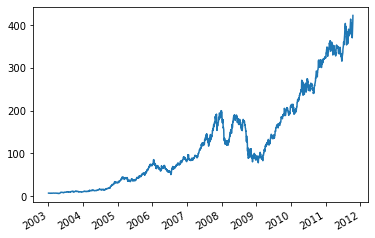

In [85]:
close_px.AAPL.plot()

<AxesSubplot:>

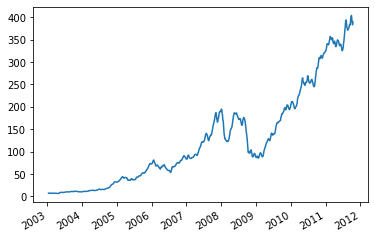

In [95]:
close_px.AAPL.rolling(10).mean().plot()    # 10일의 평균치로 묶어서 본 그래프.